In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
#Implementing the SIR Model
#Initializing the Differential Equations
#N = total number of population
#r = transition rate S->I
#a = transition rate I->R
#Susceptible equation
def se(N,S,I,r):
    se=-(r*S*I)
    return se
#Infected equation
def ie(N,S,I,r,a):
    ie=(r*S*I)-(a*I)
    return ie
#Recovered Equation
def re(N,I,a):
    re=a*I
    return re

In [36]:
#Runge-Kutta method of 4rth order for 3 dimensions (susceptible S, infected I and recovered R) for solving the differential equations
def rK4(N, S, I, R, se, ie, re, r, a, hs):
    a1 = se(N, S, I, r)*hs
    b1 = ie(N, S, I, r, a)*hs
    c1 = re(N, I, a)*hs
    ak = S + a1*0.5
    bk = I + b1*0.5
    ck = R + c1*0.5
    a2 = se(N, ak, bk, r)*hs
    b2 = ie(N, ak, bk, r, a)*hs
    c2 = re(N, bk, a)*hs
    ak = S + a2*0.5
    bk = I + b2*0.5
    ck = R + c2*0.5
    a3 = se(N, ak, bk, r)*hs
    b3 = ie(N, ak, bk,r, a)*hs
    c3 = re(N, bk, a)*hs
    ak = S + a3
    bk = I + b3
    ck = R + c3
    a4 = se(N, ak, bk, r)*hs
    b4 = ie(N, ak, bk, r, a)*hs
    c4 = re(N, bk, a)*hs
    S= S + (a1 + 2*(a2 + a3) + a4)/6
    I = I + (b1 + 2*(b2 + b3) + b4)/6
    R = R + (c1 + 2*(c2 + c3) + c4)/6
    return S, I, R


In [37]:
#To find r,a assuming S(initial)=N-1,R(initial)=0 and I(initial)=1
#hs = jump step of the numerical integration
#call rk4 method
def SIR(N, b0, r, a, hs):
    # Initial condition
    S = float(N-1)/N -b0
    I = float(1)/N +b0
    R = 0.

    sus, inf, rec= [],[],[]
    for i in range(1000): # Run for a certain number of time-steps
        sus.append(S)
        inf.append(I)
        rec.append(R)
        S,I,R = rK4(N, S, I, R, se, ie, re, r, a, hs)

    return sus, inf, rec


In [38]:
p = np.arange(0,1000,1)

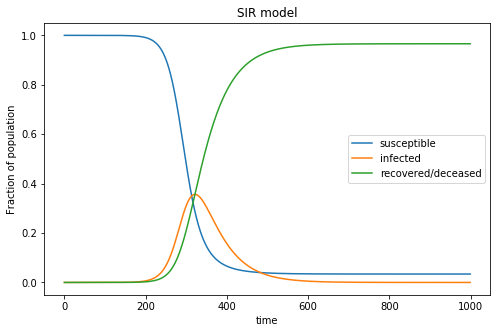

In [39]:
N = 3416662
b0 = 0
r = 0.7
a= 0.2
hs = 0.1

sus, inf, rec = SIR(N, b0, r, a, hs)

f = plt.figure(figsize=(8,5)) 
plt.plot(p,sus, label='susceptible');
plt.plot(p,inf, label='infected');
plt.plot(p,rec, label='recovered/deceased');
plt.title("SIR model")
plt.xlabel("time", fontsize=10);
plt.ylabel("Fraction of population", fontsize=10);
plt.legend(loc='best')
#plt.xlim(0,1000)
plt.savefig('SIR_example.png')
plt.show()

In [40]:
from scipy.integrate import odeint
from scipy.optimize import curve_fit

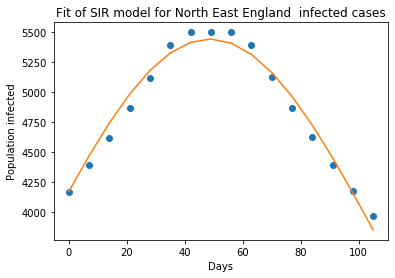

Optimal parameters: beta = 0.38869822569888896  and gamma =  0.3776536364981327
The Predicted Infected cases by the given SIR Model are
[4169.         4468.49928889 4743.60146807 4984.6048762  5182.30638278
 5328.70282659 5417.65659173 5445.434593   5411.04085176 5316.29220273
 5165.62770438 4965.68402445 4724.70404676 4451.86446129 4156.60898125
 3848.05911107]


In [41]:
ydata = [4169,4389,4621,4865,5122,5392,5500,5501,5502,5395,5125,4866,4622,4390,4170,3961]
xdata = [0,7,14,21,28,35,42,49,56,63,70,77,84,91,98,105]
ydata = np.array(ydata, dtype=float)
xdata = np.array(xdata, dtype=float)

N = float(3416662)
inf0 = ydata[0]
sus0 = N - inf0
rec0 = 0.0

def sir_model(y, x, beta, gamma):
    sus = -beta * y[0] * y[1] / N
    rec = gamma * y[1]
    inf = -(sus + rec)
    return sus, inf, rec

def fit_odeint(x, beta, gamma):
    return odeint(sir_model, (sus0, inf0, rec0), x, args=(beta, gamma))[:,1]

popt, pcov = curve_fit(fit_odeint, xdata, ydata)
fitted = fit_odeint(xdata, *popt)

plt.plot(xdata, ydata, 'o')
plt.plot(xdata, fitted)
plt.title("Fit of SIR model for North East England  infected cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.savefig("Infected_cases.png")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
print("The Predicted Infected cases by the given SIR Model are")
print(fitted)


# Mean square error : mean ((y_pred - y)^2)

In [42]:
np.mean(np.square(np.subtract(ydata,fitted)))

6658.38889281338

# Absolute value : mean(|y_pred-y|)

In [43]:
np.mean(np.absolute(np.subtract(ydata,fitted)))

74.00606841834758

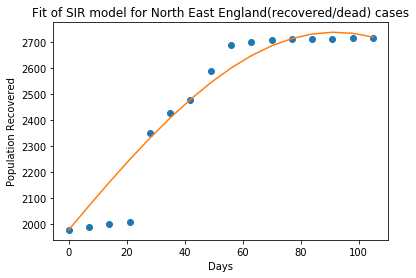

Optimal parameters: beta = 0.32063632537582004  and gamma =  0.3137181042293039
The Predicted Recovered cases by the given SIR Model are
[1978.         2070.38567761 2160.49448086 2247.37934906 2330.0626749
 2407.55602748 2478.88229406 2543.09959495 2599.32606054 2646.76445416
 2684.7255105  2712.64887543 2730.12056295 2736.88600181 2732.85802314
 2718.1192044 ]


In [44]:
xdata = [0,7,14,21,28,35,42,49,56,63,70,77,84,91,98,105]
ydata = [1978,1989,2000,2010,2350,2426,2475,2589,2688,2700,2708,2710,2711,2712,2713,2714]
ydata = np.array(ydata, dtype=float)
xdata = np.array(xdata, dtype=float)

N = float(3416662)
inf0 = ydata[0]
sus0 = N - inf0
rec0 = 0.0

def sir_model(y, x, beta, gamma):
    sus = -beta * y[0] * y[1] / N
    rec = gamma * y[1]
    inf = -(sus + rec)
    return sus, inf, rec

def fit_odeint(x, beta, gamma):
    return odeint(sir_model, (sus0, inf0, rec0), x, args=(beta, gamma))[:,1]

popt, pcov = curve_fit(fit_odeint, xdata, ydata)
fitted = fit_odeint(xdata, *popt)

plt.plot(xdata, ydata, 'o')
plt.plot(xdata, fitted)
plt.title("Fit of SIR model for North East England(recovered/dead) cases")
plt.ylabel("Population Recovered")
plt.xlabel("Days")
plt.savefig('Recovered_cases.png')
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
print("The Predicted Recovered cases by the given SIR Model are")
print(fitted)
